# Jigsaw - Agile Community Rules Classification
### https://www.kaggle.com/competitions/jigsaw-agile-community-rules

In [67]:
import kagglehub
import pandas as pd
import os

base_path = "./data/final/"
df_train = pd.read_csv(f"{base_path}df_train_unclean.csv")
print(df_train.shape)
df=df_train.copy()
df_train.head(1)



(29341, 8)


,subreddit,rule,positive_example_1,negative_example_1,positive_example_2,negative_example_2,test_comment,violates_rule
0,aiArt,Be Respectful and Civil: Be kind and construct...,"Your 'art' is pure trash. Seriously, go back t...",This is a really interesting take on 'cyberpun...,"Ugh, another generic waifu generated by some i...","Wow, the details in the hair are incredible! W...",Anyone who thinks using a basic prompt for a c...,Yes


In [68]:
df_train.columns

Index(['subreddit', 'rule', 'positive_example_1', 'negative_example_1',
       'positive_example_2', 'negative_example_2', 'test_comment',
       'violates_rule'],
      dtype='object')

In [69]:
# 1. Compute word counts per cell
word_counts = df.applymap(lambda x: len(str(x).split()))
# 2. Filter rows where all columns have word count <= 60
df_filtered = df[word_counts.le(120).all(axis=1)]
print("Word counts per cell:\n", word_counts)
print("\nFiltered dataframe:\n", df_filtered)
df=df_filtered.copy()

Word counts per cell:
        subreddit  rule  positive_example_1  negative_example_1  \
0              1    16                  21                  26   
1              1    16                  24                  26   
2              1    16                  26                  25   
3              1    15                  21                  30   
4              1    18                  24                  19   
...          ...   ...                 ...                 ...   
29336          1    14                  37                  27   
29337          1    10                  26                  20   
29338          1    11                  17                  18   
29339          1    13                  17                  11   
29340          1    14                  28                  28   

       positive_example_2  negative_example_2  test_comment  violates_rule  
0                      25                  24            27              1  
1                      25     

/tmp/ipykernel_5955/999892374.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  word_counts = df.applymap(lambda x: len(str(x).split()))


In [70]:
# Columns to check
cols_to_check = ["positive_example_1", "negative_example_1", 
                 "positive_example_2", "negative_example_2", "test_comment"]

# Calculate word counts only for selected columns
word_counts = df[cols_to_check].applymap(lambda x: len(str(x).split()))

# Keep rows where all selected columns have at least 6 words
df_filtered = df[word_counts.ge(1).all(axis=1)]

print("Word counts in selected columns:\n", word_counts)
print("\nFiltered dataframe:\n", df_filtered)
df=df_filtered.copy()

/tmp/ipykernel_5955/1580314125.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  word_counts = df[cols_to_check].applymap(lambda x: len(str(x).split()))


Word counts in selected columns:
        positive_example_1  negative_example_1  positive_example_2  \
0                      21                  26                  25   
1                      24                  26                  25   
2                      26                  25                  22   
3                      21                  30                  30   
4                      24                  19                  27   
...                   ...                 ...                 ...   
29336                  37                  27                  33   
29337                  26                  20                  18   
29338                  17                  18                  23   
29339                  17                  11                  18   
29340                  28                  28                  33   

       negative_example_2  test_comment  
0                      24            27  
1                      26            33  
2          

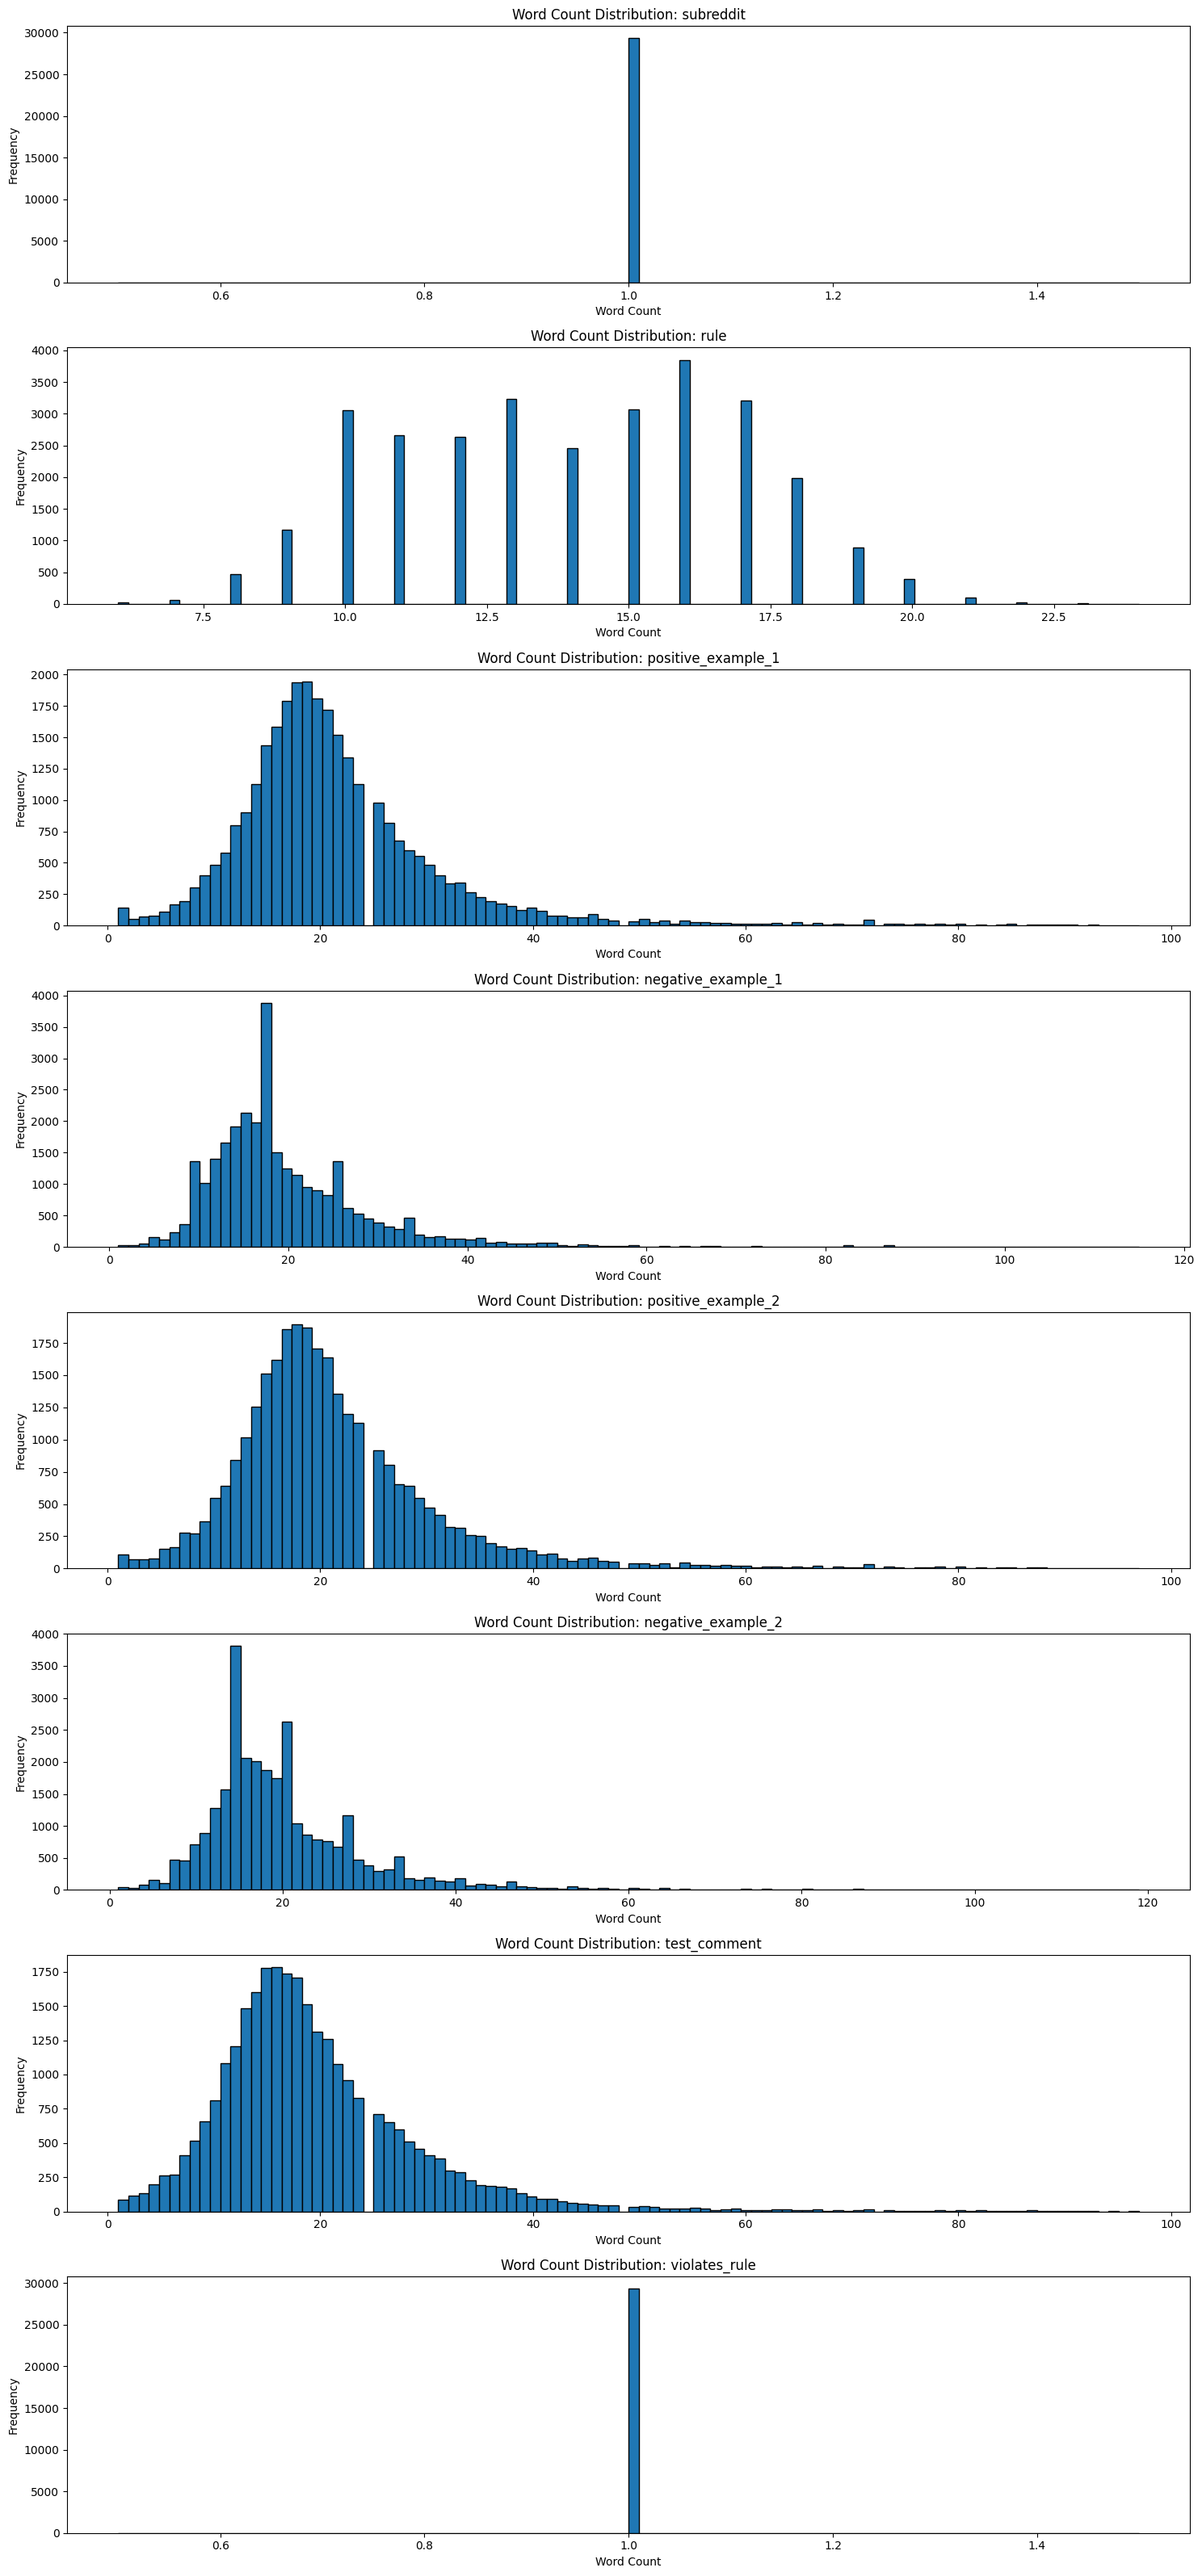

  subreddit                                               rule  \
0     aiArt  Be Respectful and Civil: Be kind and construct...   
1     aiArt  No Advertising or Selling: No selling. Self-pr...   
2     aiArt  SFW Content Only: Posts must be safe for work....   
3     aiArt  AI Videos Go to r/AIVideos: Post AI-generated ...   
4     aiArt  Use Appropriate Flair: Select the flair matchi...   

                                  positive_example_1  \
0  Your 'art' is pure trash. Seriously, go back t...   
1  This trippy cyber-synth city render is availab...   
2  OMG this new 'Red Velvet' model literally pain...   
3  My latest text2video is mind-blowing. Full sho...   
4  Forgot to add it to the title but this was def...   

                                  negative_example_1  \
0  This is a really interesting take on 'cyberpun...   
1  Honestly, seeing all this awesome AI art makes...   
2  Awesome job with the lighting here! Did you us...   
3  Has anyone else been playing around wit

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded
# Example: df = pd.read_csv("your_file.csv")

# Select only text-like columns
text_df = df.select_dtypes(exclude=["bool", "int", "float"])

# Create new columns with word counts for each original column
for col in text_df.columns:
    df[col + "_word_count"] = text_df[col].apply(lambda x: len(str(x).split()))

# Plot histogram for each column's word count
num_cols = len(text_df.columns)
plt.figure(figsize=(15, 4 * num_cols))

for i, col in enumerate(text_df.columns):
    plt.subplot(num_cols, 1, i + 1)
    plt.hist(df[col + "_word_count"], bins=100, edgecolor='black')
    plt.title(f"Word Count Distribution: {col}")
    plt.xlabel("Word Count")
    plt.ylabel("Frequency")
    #plt.xlim([0,50])

plt.tight_layout()
plt.show()

# Optional: see first few rows with new word count columns
print(df.head())


In [72]:
df.shape

(29321, 16)

In [73]:
df["violates_rule"].unique()

array(['Yes', 'No'], dtype=object)

In [74]:
req_cols=['subreddit', 'rule', 'positive_example_1', 'negative_example_1', \
       'positive_example_2', 'negative_example_2', 'test_comment', \
       'violates_rule']
df[req_cols].to_csv("df_final.csv",index=False)